In [1]:
# importing packages and modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from utils import *
from plotting_utils import *
from analysis_utils import *
import dglm_hmm2
import dglm_hmm1
from scipy.stats import multivariate_normal, norm

In [4]:
animals = ['29L_','3095_','3096_','3097_','30B_','30L_','30R2_','4013_','4014_','4015_','4016_','91R2_']
days = ['d1_balbc','d2_balbc','d3_balbc','d4_balbc','d5_balbc','d6_balbc','d7_balbc','d8_balbc','d9_mCD1']
obsDays = []
sessions = ['_t1','_t2','_t3']

In [5]:
featuresShortlist1 = ["proximity",'resident2intruder head-head', 'resident2intruder head-tti','resident2intruder head2head angle', 'resident2intruder head2tti angle', "intruder2resident head2centroid angle","resident centroid roc 500 ms", "intruder centroid roc 500 ms",
   "resident tti2head", "intruder tti2head", "resident tailbase2head angle", "intruder tailbase2head angle"]
featuresShortlist2 = ["proximity",'resident2intruder head-head','resident2intruder head-tti','resident2intruder head2centroid angle',"resident centroid roc 500 ms","intruder centroid roc 500 ms"]
# ARE THERE HEAD TO TAIL AND HEAD TO HEAD ANLGES?

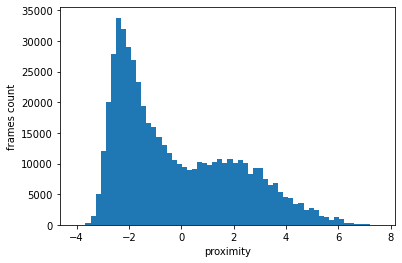

In [6]:
plt.hist(a[:,0], bins=60)
plt.ylabel('frames count')
plt.xlabel('proximity')
plt.show()

### Reading PICKLE FILES


In [7]:
df = pd.read_pickle('../data_falkner/29L_d1_balbc_t1_zscored_features.pickle')
df = df[featuresShortlist]
df.head()


,proximity,resident2intruder head2centroid angle,intruder2resident head2centroid angle,resident centroid roc 500 ms,intruder centroid roc 500 ms,resident tti2head,intruder tti2head,resident tailbase2head angle,intruder tailbase2head angle
0,3.983381,2.497344,-1.063459,-1.930618,-2.124831,-1.358553,0.546214,-0.456123,0.165161
1,3.863617,2.050096,-1.188772,-1.930618,-2.124831,-1.363754,1.286370,0.779425,-1.063931
2,3.434315,2.509805,-1.200114,-1.930618,-2.124831,-1.275087,1.165050,-0.568938,-1.381684
3,3.196859,2.362525,-1.176833,-1.930618,-2.124831,-1.315733,0.789493,-0.176341,-0.896078
4,3.054127,2.392026,-1.152817,-1.930618,-2.124831,-1.271848,0.760513,-0.406515,-0.888179


In [21]:
obs = pd.read_pickle('../data_falkner/29L_d1_balbc_t1_zscored_features.pickle')
print(obs.columns.tolist())
print(obs['resident2intruder head2tti angle'])

['resident tti2head', 'resident tti2trunk', 'resident tti2neck', 'resident tti2centroid', 'resident head2nose', 'resident trunk2head', 'resident forepaw left2head', 'resident forepaw right2head', 'resident forepaw left2trunk', 'resident forepaw right2trunk', 'resident hindpaw left2trunk', 'resident hindpaw right2trunk', 'resident hindpaw left2tti', 'resident hindpaw right2tti', 'resident hindpaw left2right', 'resident forepaw left2right', 'resident tailbase2head angle', 'resident tailbase2nose angle', 'resident centroid2nose angle', 'resident neck2nose angle', 'resident tailbase2trunk angle', 'resident tti2head roc 50 ms', 'resident tti2head abs roc 50 ms', 'resident tti2head reverse roc 50 ms', 'resident tti2head abs reverse roc 50 ms', 'resident tti2neck roc 50 ms', 'resident tti2neck abs roc 50 ms', 'resident tti2neck reverse roc 50 ms', 'resident tti2neck abs reverse roc 50 ms', 'resident centroid roc 50 ms', 'resident centroid reverse roc 50 ms', 'resident head roc 50 ms', 'reside

In [23]:
# saving features from shortlist1
for animal in ['29L_']:
    for day in days:
        for sess in sessions:
            df = pd.read_pickle(f'../data_falkner/{animal+day+sess}_zscored_features.pickle')
            df = df[featuresShortlist1]
            a = np.array(df)
            np.save(f'../data_falkner/{animal+day+sess}_featuresShortlist1', a)
            print(a.shape)

(21023, 12)
(21135, 12)
(21098, 12)
(21072, 12)
(21414, 12)
(20542, 12)
(21189, 12)
(21088, 12)
(22768, 12)
(20910, 12)
(20236, 12)
(19945, 12)
(20503, 12)
(20677, 12)
(20461, 12)
(19983, 12)
(20830, 12)
(20853, 12)
(21002, 12)
(22160, 12)
(20807, 12)
(21059, 12)
(21187, 12)
(22930, 12)
(9577, 12)
(9509, 12)
(9488, 12)


In [5]:
# saving dataset with all features as .npy
for animal in ['29L_']:
    for day in days:
        for sess in sessions:
            df = pd.read_pickle(f'../data_falkner/{animal+day+sess}_zscored_features.pickle')
            a = np.array(df)
            np.save(f'../data_falkner/{animal+day+sess}_allFeatures', a)
            print(a.shape)

(21023, 780)
(21135, 780)
(21098, 780)
(21072, 780)
(21414, 780)
(20542, 780)
(21189, 780)
(21088, 780)
(22768, 780)
(20910, 780)
(20236, 780)
(19945, 780)
(20503, 780)
(20677, 780)
(20461, 780)
(19983, 780)
(20830, 780)
(20853, 780)
(21002, 780)
(22160, 780)
(20807, 780)
(21059, 780)
(21187, 780)
(22930, 780)
(9577, 780)
(9509, 780)
(9488, 780)


In [7]:
# All sessions together
sessInd = [0]
for animal in ['29L_']:
    for day in days:
        for sess in sessions:
            if (day == 'd1_balbc' and sess =='_t1'):
                y = np.load('../data_falkner/' + f'{animal+day+sess}_aggr_labels.npy')
                x = np.load(f'../data_falkner/{animal+day+sess}_featuresShortlist1.npy')
                sessInd.append(y.shape[0])
            else:
                tempY = np.load('../data_falkner/' + f'{animal+day+sess}_aggr_labels.npy')
                tempX = np.load(f'../data_falkner/{animal+day+sess}_featuresShortlist1.npy')
                y = np.concatenate((y,tempY))
                x = np.concatenate((x,tempX))
                sessInd.append(tempY.shape[0] + int(sessInd[-1]))

### FITTING DGLM-HMM - Version 1 (varying W and constant P) TO SINGLE ANIMAL 29L ALL session together

In [6]:
folds = 3
trainX, trainY, trainSessInd, testX, testY, testSessInd = split_data_per_session(x, y, sessInd, folds=3, random_state=1)
D = trainX[0].shape[1]
C = 2 # only looking at binomial classes
maxiter = 600
K = 3

sigmaList = [0, 0.01, 0.1, 1, 10, 100]

trainLl = [np.zeros((len(sigmaList), maxiter)) for i in range(0,folds)] 
testLl = [np.zeros((len(sigmaList))) for i in range(0,folds)]
allP = [np.zeros((len(sigmaList), K,K)) for i in range(0,folds)] 
allW = [] 

for fold in range(0,folds):
    # initializing parameters for each fold
    N = trainX[fold].shape[0]
    oneSessInd = [0,N] # treating whole dataset as one session for normal GLM-HMM fitting
    dGLM_HMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
    allW.append(np.zeros((len(sigmaList), N,K,D,C)))
    trainY[fold] = trainY[fold].astype(int)
    testY[fold] = testY[fold].astype(int)

    for indSigma in range(0,len(sigmaList)): 
        print(sigmaList[indSigma])
        if (indSigma == 0): 
            if(sigmaList[0] == 0):
                initP0, initW0 = dGLM_HMM.generate_param(sessInd=oneSessInd, transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) 
                allP[fold][indSigma],  allW[fold][indSigma], trainLl[fold][indSigma] = dGLM_HMM.fit(trainX[fold], trainY[fold],  initP0, initW0, sigma=reshapeSigma(1, K, D), sessInd=oneSessInd, pi0=None, maxIter=maxiter, tol=1e-3) # sigma does not matter here
            else:
                initP, initW = dGLM_HMM.generate_param(sessInd=trainSessInd[fold], transitionDistribution=['dirichlet', (5, 1)], weightDistribution=['uniform', (-2,2)]) # initialize the model parameters
        else:
            initP = allP[fold][indSigma-1] 
            initW = allW[fold][indSigma-1] 
            
        # fitting dGLM-HMM
        if(sigmaList[indSigma] != 0):
            allP[fold][indSigma],  allW[fold][indSigma], trainLl[fold][indSigma] = dGLM_HMM.fit(trainX[fold], trainY[fold],  initP, initW, sigma=reshapeSigma(sigmaList[indSigma], K, D), sessInd=trainSessInd[fold], pi0=None, maxIter=maxiter, tol=1e-3) # fit the model
        
        # evaluate
        sess = len(trainSessInd[fold]) - 1 # number sessions
        testPhi = dGLM_HMM.observation_probability(testX[fold], reshapeWeights(allW[fold][indSigma], trainSessInd[fold], testSessInd[fold]))
        for s in range(0, sess):
            # evaluate on test data for each session separately
            _, _, temp = dGLM_HMM.forward_pass(testY[fold][testSessInd[fold][s]:testSessInd[fold][s+1]],allP[fold][indSigma],testPhi[testSessInd[fold][s]:testSessInd[fold][s+1]])
            testLl[fold][indSigma] += temp
    
    testLl[fold] = testLl[fold] / testSessInd[fold][-1] # normalizing to the total number of trials in test dataset

    np.save(f'../data/trainLl_Falkner_29L_{K}_state_fold-{fold}_multiple_sigmas', trainLl[fold])
    np.save(f'../data/testLl_Falkner_29L_{K}_state_fold-{fold}_multiple_sigmas', testLl[fold])
    np.save(f'../data/P_Falkner_29L_{K}_state_fold-{fold}_multiple_sigmas', allP[fold])
    np.save(f'../data/W_Falkner_29L_{K}_state_fold-{fold}_multiple_sigmas', allW[fold])
    np.save(f'../data/trainSessInd_Falkner_29L_{K}_state_fold-{fold}_multiple_sigmas', np.array(trainSessInd[fold]))
    np.save(f'../data/testSessInd_Falkner_29L_{K}_state_fold-{fold}_multiple_sigmas', np.array(testSessInd[fold]))


NameError: name 'x' is not defined

### DO LOGISTIC REGRESSION ON ALL THE FEATURES TO SEE WHICH MATTER THE MOST

In [7]:
# Per day logistic regression behavioral features and attack or not
# Import outside packages by changing the path
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', '..', 'glmhmm')))
from glmhmm import glm, glm_hmm, utils
from glmhmm.utils import permute_states, find_best_fit, compare_top_weights
from glmhmm import visualize, analysis

sessInd = [0]
animal = '29L_'
M = 780 # number of GLM inputs (regressors) - all behavioral features from Jorge
w = np.zeros((len(days), M, 2))

for i in range(0,len(days)):
    print(i)
    day = days[i]
    sessInd = [0]

    for sess in sessions:
        if (sess =='_t1'):
            y = np.load('../data_falkner/' + f'{animal+day+sess}_aggr_labels.npy')
            x = np.load(f'../data_falkner/{animal+day+sess}_allFeatures.npy')
            sessInd.append(y.shape[0])
        else:
            tempY = np.load('../data_falkner/' + f'{animal+day+sess}_aggr_labels.npy')
            tempX = np.load(f'../data_falkner/{animal+day+sess}_allFeatures.npy')
            y = np.concatenate((y,tempY))
            x = np.concatenate((x,tempX))
            sessInd.append(tempY.shape[0] + int(sessInd[-1]))
    sessInd = np.array(sessInd)

    N = x.shape[0] # number of data/time points
    C = 2 # number of observation classes

    # make a GLM with these parameters and set distribution type
    GLM = glm.GLM(N,M,C,observations="bernoulli")

    w_init = GLM.init_weights(wdist=(-1,1))
    w[i], phi = GLM.fit(x,w_init,y, compHess=True)
    variance = GLM.variance


0


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in subtract
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in true_divide
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/numpy/n

1


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in subtract
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in true_divide
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/numpy/n

2


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in subtract
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in true_divide
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/numpy/n

3


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in subtract
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in true_divide
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/numpy/n

4


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in subtract
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in true_divide
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/numpy/n

5


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in subtract
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in true_divide
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/numpy/n

6


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in subtract
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in true_divide
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/numpy/n

7


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in subtract
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in true_divide
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/numpy/n

8


/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in subtract
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in true_divide
  return f_raw(*args, **kwargs)
/Users/lencacuturela/opt/anaconda3/envs/glmhmm/lib/python3.7/site-packages/autograd/numpy/n

In [8]:
# df = pd.read_pickle(f'../data_falkner/29L_d1_balbc_t1_zscored_features.pickle')
# allFeatures = df.columns.tolist()
# df.to_csv('../data_falkner/29L_d1_balbc_t1_zscored_features.csv')
df = pd.read_csv('../data_falkner/29L_d1_balbc_t1_zscored_features.csv', index_col=0)
allFeatures = df.columns.tolist()

In [19]:
a = np.abs(w[1,:,1])
id = np.argsort(a)
for i in range(0,id.shape[0]):
    if (i > id.shape[0] - 20):
        print(allFeatures[id[i]])

resident tailbase2nose angle reverse roc 1000 ms
proximity abs roc 1000 ms
intruder t1 reverse roc 5000 ms
intruder tti2head abs reverse roc 2000 ms
resident tailbase2trunk angle abs roc 50 ms
resident tailbase2nose angle reverse roc 2000 ms
resident centroid2nose angle roc 50 ms
intruder forepaw left2trunk
resident tti2neck roc 2000 ms
intruder tti roc 50 ms
resident centroid2nose angle abs reverse roc 50 ms
intruder t0 roc 5000 ms
resident tti2head
proximity abs roc 5000 ms
resident tailbase2trunk angle reverse roc 2000 ms
resident head roc 1000 ms
intruder tailbase2nose angle reverse roc 4000 ms
proximity abs reverse roc 5000 ms
head roc differential 50 ms


In [21]:
featuresChange = np.zeros((M))
for i in range(0,len(days)-1):
    featuresChange += np.abs(w[i,:,1] - w[i+1,:,1])
id = np.argsort(featuresChange)
for i in range(0,id.shape[0]):
    if (i > id.shape[0] - 20):
        print(allFeatures[id[i]])

intruder avg tail roc 5000 ms
resident tailbase2head angle reverse roc 1000 ms
intruder tailbase2head angle reverse roc 50 ms
intruder2resident nose-centroid
resident centroid2nose angle abs roc 1000 ms
intruder neck2nose angle roc 1000 ms
resident tti2head roc 1000 ms
resident centroid2nose angle abs roc 2000 ms
intruder t0 reverse roc 5000 ms
resident neck2nose angle abs reverse roc 2000 ms
resident avg tail roc 1000 ms
resident neck2nose angle reverse roc 50 ms
resident neck2nose angle abs roc 2000 ms
intruder neck2nose angle roc 50 ms
intruder tti2head abs reverse roc 100 ms
resident centroid roc 100 ms
resident tti2head abs roc 5000 ms
intruder tailbase2head angle abs reverse roc 5000 ms
resident centroid2nose angle roc 5000 ms
